In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px

In [14]:
data = pd.read_csv('FINAL_ARXIV_2025_copy.csv')

In [15]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['powered by accretion of matter from a compan...,2025-01-01
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,NaN,[],2025-01-01
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18267,DESI Strong Lens Foundry V: A Sample of HST-Ob...,We present six galaxy-scale strong lenses with...,"['Xiaosheng Huang', 'David Alvarez-Garcia', 'M...",26.0,40.0,19.0,arxiv.org/pdf/2512.07823,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,SF2A-2025: Proceedings of the Annual meeting o...,['galaxies: high-redshift – gravitational lens...,2025-12-01
18268,"Hot, Photoionized X-ray Gas in Two Luminous Ty...",We present new Chandra/ACIS-S imaging spectros...,"['Anna Trindade Falcão', 'S. Kraemer', 'L. Feu...",8.0,19.0,6.0,arxiv.org/pdf/2512.07793,Astrophysics of Galaxies,NaN,NaN,NaN,['High-luminosity active galactic nuclei'],2025-12-01
18269,Microquasar remnants as hidden PeVatrons,The Large High Altitude Air Shower Observatory...,"['Leandro Abaroa', 'Gustavo E. Romero', 'Valen...",3.0,4.0,0.0,arxiv.org/pdf/2512.07781,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['Cosmic rays – relativistic processes – X-ray...,2025-12-01
18270,X-ray Analysis of Gamma-Ray Burst Flares and U...,Gamma-ray burst (GRB) X-ray light curves exhib...,"['H. Dereli-Bégué', ""A. Pe'er"", 'D. Bégué', 'F...",10.0,28.0,4.0,arxiv.org/pdf/2512.07731,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,"['Light Curves: X-ray', 'Gamma-ray bursts', 'R...",2025-12-01


In [16]:
print(data['submitted_journal'].unique())

['AAS Journals' nan
 'IEEE Transactions on Applied Superconductivity for ASC2024 special issue'
 'appear in the Proceedings of the 17th Marcel Grossmann Meeting (MG17)/Pescara'
 'ApJ' 'A&A' 'Monthly Notices of the Royal Astronomical Society (MNRAS)'
 'Astronomy & Astrophysics' 'PASP' 'MNRAS'
 'Astronomy & Astrophysics (A&A)' 'ApJL' 'AJ Jan 23 2025'
 'the Open Journal of Astrophysics'
 'Astronomy & Astrophysics on 20 January' 'MNRAS (23 January 2025)'
 'ApJ January 22' 'the Journal of High Energy Astrophysics' 'PRD' 'JHEAP'
 'the Astrophysical Bulletin journal' 'AJ' 'Astronomy and Astrophysics'
 'the Astrophysical Journal' 'Astronomy and Astrophysics Letters'
 'Astronomy & Astrophysics (16 pages' 'Astronomy & Astrophysics (18 pages'
 'JOSS' 'PASA' 'MRNAS' 'EPJ Web Conf' 'ApJS' 'The Astrophysical Journal'
 'Astronomical Data Analysis Software and Systems (ADASS) XXXIV 2024'
 'Research Notes of the AAS' 'Astronomy and Astrophysics (A&A)'
 'MNRAS in this form'
 'ApJ- this is the revised ve

In [21]:
# Standardizing journal names
list_of_journals = [
    'The Astrophysical Journal',
    'The Astrophysical Journal Letters',
    'The Astrophysical Journal Supplement Series',
    'Monthly Notices of the Royal Astronomical Society',
    'Astronomy & Astrophysics',
    'The Astronomical Journal',
    'Publications of the Astronomical Society of the Pacific',
    'Nature Astronomy',
    'Science',
    'Physical Review D',
    'Physical Review Letters',
    'The Journal of Open Source Software',
    'Publications of the Astronomical Society of Australia',
    'Institute of Electrical and Electronics Engineers',
    'Journal of High Energy Physics',
    'Journal of Astrophysics and Astronomy',
    'Astrophysical Bulletin',
    'American Journal of Physics'
]

# Accounting for shortened or alternative journal names
journal_aliases = {
    'ApJ': 'The Astrophysical Journal',
    'ApJL': 'The Astrophysical Journal Letters',
    'ApJS': 'The Astrophysical Journal Supplement Series',
    'MNRAS': 'Monthly Notices of the Royal Astronomical Society',
    'A&A': 'Astronomy & Astrophysics',
    'AAS': 'American Astronomical Society',
    'AJ': 'The Astronomical Journal',
    'PASP': 'Publications of the Astronomical Society of the Pacific',
    'Nat Astron': 'Nature Astronomy',
    'PRD': 'Physical Review D',
    'PRL': 'Physical Review Letters',
    'JOSS': 'The Journal of Open Source Software',
    'PASA': 'Publications of the Astronomical Society of Australia',
    'IEEE': 'Institute of Electrical and Electronics Engineers',
    'JHEP': 'Journal of High Energy Physics',
    'JAA': 'Journal of Astrophysics and Astronomy',
    'RAA': 'Research in Astronomy and Astrophysics',
    'Phys Rev D': 'Physical Review D',

}

for i in range(len(data)):
    # Check if the value is a string to avoid TypeError with NaN (which is float)
    if isinstance(data.at[i, 'submitted_journal'], str):
        for j in range(len(list_of_journals)):
            if list_of_journals[j].lower() in data.at[i, 'submitted_journal'].lower():
                data.at[i, 'submitted_journal'] = list_of_journals[j]
        for alias, full_name in journal_aliases.items():
            if alias.lower() in data.at[i, 'submitted_journal'].lower():
                data.at[i, 'submitted_journal'] = full_name

In [22]:
print(data['submitted_journal'].unique())

['American Astronomical Society' nan
 'Institute of Electrical and Electronics Engineers'
 'appear in the Proceedings of the 17th Marcel Grossmann Meeting (MG17)/Pescara'
 'The Astrophysical Journal' 'Astronomy & Astrophysics'
 'Monthly Notices of the Royal Astronomical Society'
 'Publications of the Astronomical Society of the Pacific'
 'The Astronomical Journal' 'the Open Journal of Astrophysics'
 'the Journal of High Energy Astrophysics' 'Physical Review D' 'JHEAP'
 'Astrophysical Bulletin' 'Astronomy and Astrophysics'
 'Astronomy and Astrophysics Letters'
 'The Journal of Open Source Software'
 'Publications of the Astronomical Society of Australia' 'MRNAS'
 'EPJ Web Conf'
 'Astronomical Data Analysis Software and Systems (ADASS) XXXIV 2024'
 'Encyclopedia of Astrophysics' 'Astronomical Journal'
 'Research in Astronomy and Astrophysics'
 'Journal of Astrophysics and Astronomy'
 'Contributions of the Astronomical Observatory Skalnate Pleso' 'PSJ'
 '33rd Euromicro International Confe

In [41]:
list_of_telescopes = [
    'HST',
    'Chandra',
    'Spitzer',
    'JWST',
    'VLT',
    'ALMA',
    'Keck',
    'Subaru',
    'Euclid',
    'Nancy Grace Roman Space Telescope',
    'Vera C. Rubin Observatory',
    'SDSS',
    'GAIA',
    'ZWICKY',
    'LIGO',
    'LISA',
    'Fermi',
    'Swift',
    'TESS',
    'NICER',
    'NuSTAR',
    'XMM-Newton',
    'INTEGRAL',
    'SPHEREx',
    'SVOM',
    'AstroSat',
    'HXMT',
    'XRISM',
    'Einstein Probe',
    'IXPE',
    'XPoSat',
    'IRIS',
    'CUTE',
    'GLIDE',
    'NEOSSat',
    'CHEOPS',
    'DAMPE',
    'CALCET'
]

long_names = {
    'HST': 'Hubble Space Telescope',
    'JWST': 'James Webb Space Telescope',
    'VLT': 'Very Large Telescope',
    'ALMA': 'Atacama Large Millimeter/submillimeter Array',
    'SDSS': 'Sloan Digital Sky Survey',
    'LIGO': 'Laser Interferometer Gravitational-Wave Observatory',
    'LISA': 'Laser Interferometer Space Antenna',
    'ZWICKY': 'Zwicky Transient Facility',
    'Chandra': 'Chandra X-ray Observatory',
    'Spitzer': 'Spitzer Space Telescope',
    'Fermi': 'Fermi Gamma-ray Space Telescope',
    'Swift': 'Neil Gehrels Swift Observatory',
    'TESS': 'Transiting Exoplanet Survey Satellite',
    'NICER': 'Neutron star Interior Composition Explorer',
    'GAIA': 'Global Astrometric Interferometer for Astrophysics',
    'NuSTAR': 'Nuclear Spectroscopic Telescope Array',
    'XMM-Newton': 'X-ray Multi-Mirror Mission - Newton',
    'INTEGRAL': 'INTErnational Gamma-Ray Astrophysics Laboratory',
    'SPHEREx': 'Spectro-Photometer for the History of the Universe, Epoch of Reionization, and Ices Explorer',
    'SVOM': 'Space-based multi-band astronomical Variable Objects Monitor',
    'AstroSat': 'AstroSat Space Observatory',
    'HXMT': 'Hard X-ray Modulation Telescope',
    'XRISM': 'X-ray Imaging and Spectroscopy Mission',
    'Einstein Probe': 'Einstein Probe X-ray Observatory',
    'IXPE': 'Imaging X-ray Polarimetry Explorer',
    'XPoSat': 'X-ray Polarimeter Satellite',
    'IRIS': 'Interface Region Imaging Spectrograph',
    'CUTE': 'Colorado Ultraviolet Transit Experiment',
    'GLIDE': 'Carruthers Geocorona Observatory',
    'NEOSSat': 'Near-Earth Object Surveillance Satellite',
    'CHEOPS': 'Characterising Exoplanet Satellite',
    'DAMPE': 'DArk Matter Particle Explorer',
    'CALCET': 'CALorimetric Electron Telescope'
}

data['telescope'] = np.nan

for i in range(len(data)):
    if isinstance(data.at[i, 'title'], str):
        for telescope in list_of_telescopes:
            if telescope.lower() in data.at[i, 'title'].lower():
                # Assign the short form (telescope) directly
                data.at[i, 'telescope'] = telescope
    if isinstance(data.at[i, 'abstract'], str):
        for telescope in list_of_telescopes:
            if telescope.lower() in data.at[i, 'abstract'].lower():
                data.at[i, 'telescope'] = telescope

In [42]:
mask = data['telescope'].notna()
masked_data = data[mask]
masked_data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,telescope
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,Institute of Electrical and Electronics Engineers,NaN,[],2025-01-01,INTEGRAL
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01,Fermi
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01,ALMA
9,IXPE observations of supernova remnants,Supernova remnants (SNRs) are among the most i...,['Riccardo Ferrazzoli'],9.0,14.0,1.0,arxiv.org/pdf/2501.12719,High Energy Astrophysical Phenomena,NaN,appear in the Proceedings of the 17th Marcel G...,NaN,[],2025-01-01,IXPE
15,On the equivalence between galaxy angular corr...,We investigate the angular power spectrum ($C_...,"['Ryo Terasawa', 'Yue Nan', 'Masahiro Takada']",4.0,9.0,0.0,arxiv.org/pdf/2501.12661,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,[],2025-01-01,INTEGRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Detection of 27 Candidate Circumbinary Planets...,Most circumbinary planets have been discovered...,"['Margo Thornton', 'Benjamin T. Montet', 'Rile...",12.0,17.0,2.0,arxiv.org/pdf/2512.07934,Earth and Planetary Astrophysics,['Solar and Stellar Astrophysics'],NaN,NaN,['observational–planetsandsatellites:detection...,2025-12-01,TESS
18267,DESI Strong Lens Foundry V: A Sample of HST-Ob...,We present six galaxy-scale strong lenses with...,"['Xiaosheng Huang', 'David Alvarez-Garcia', 'M...",26.0,40.0,19.0,arxiv.org/pdf/2512.07823,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,SF2A-2025: Proceedings of the Annual meeting o...,['galaxies: high-redshift – gravitational lens...,2025-12-01,Euclid
18268,"Hot, Photoionized X-ray Gas in Two Luminous Ty...",We present new Chandra/ACIS-S imaging spectros...,"['Anna Trindade Falcão', 'S. Kraemer', 'L. Feu...",8.0,19.0,6.0,arxiv.org/pdf/2512.07793,Astrophysics of Galaxies,NaN,NaN,NaN,['High-luminosity active galactic nuclei'],2025-12-01,Chandra
18270,X-ray Analysis of Gamma-Ray Burst Flares and U...,Gamma-ray burst (GRB) X-ray light curves exhib...,"['H. Dereli-Bégué', ""A. Pe'er"", 'D. Bégué', 'F...",10.0,28.0,4.0,arxiv.org/pdf/2512.07731,High Energy Astrophysical Phenomena,NaN,The Astrophysical Journal,NaN,"['Light Curves: X-ray', 'Gamma-ray bursts', 'R...",2025-12-01,Swift


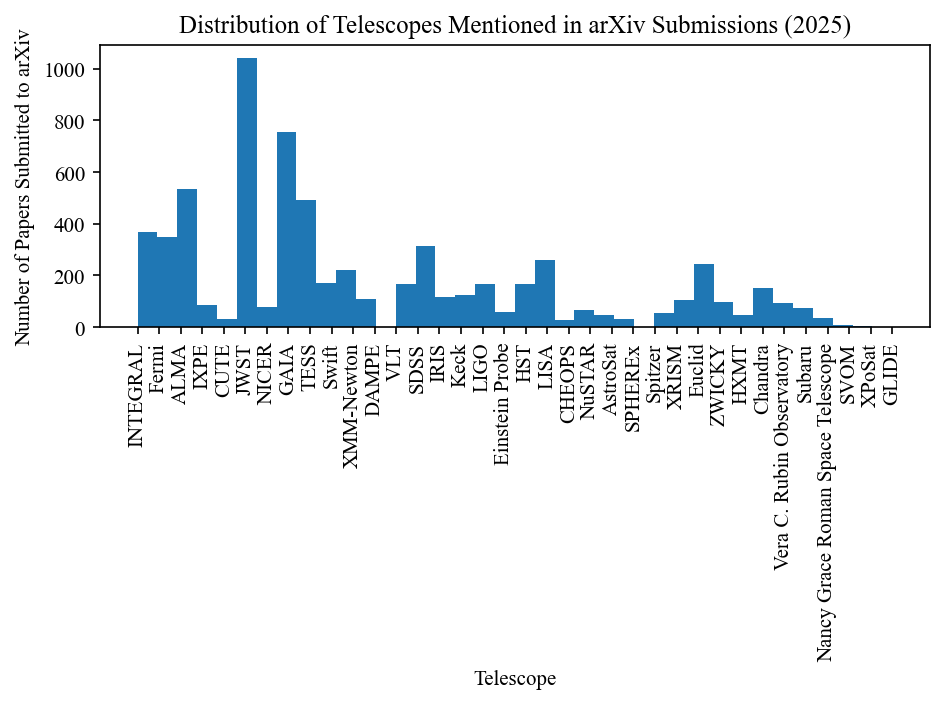

In [43]:
plt.hist(masked_data['telescope'], bins=len(list_of_telescopes))
plt.xticks(rotation=90)
plt.xlabel('Telescope')
plt.ylabel('Number of Papers Submitted to arXiv')
plt.title('Distribution of Telescopes Mentioned in arXiv Submissions (2025)')
plt.tight_layout()
plt.show()